# ПРОЕКТ ПО A/B ТЕСТИРОВАНИЮ

**СОДЕРЖАНИЕ ПРОЕКТА**
1. [ОПИСАНИЕ ПРОЕКТА (техническое задание, описание данных, цель исследования](#describ)

2. [ШАГ 1.ЗАГРУЗКА ДАННЫХ](#part_1)

3. [ШАГ 2.АНАЛИЗ КОРРЕКТНОСТИ ПРОВЕДЕНИЯ ТЕСТА](#part_2)
         
4. [ШАГ 3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ](#part_4) 

5. [ШАГ 4. ОЦЕНКА РЕЗУЛЬТАТОВ A/B-ТЕСТИРОВАНИЯ](#part_5) 
   
6. [ШАГ 5. ВЫВОДЫ](#part_6)

## ОПИСАНИЕ ПРОЕКТА 
<a id="describ"></a> 

**Цель исследования:**

Провести оценку результатов A/B-теста. Оценить корректность проведения теста и проанализировать его результаты.

**Техническое задание:**

* Название теста: recommender_system_test ;
* Группы: А (контрольная), B (новая платёжная воронка);
* Дата запуска: 2020-12-07;
* Дата остановки набора новых пользователей: 2020-12-21;
* Дата остановки: 2021-01-04;
* Ожидаемое количество участников теста: 15% новых пользователей из региона EU;
* Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
* Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 5 процентных пунктов:
   * конверсии в просмотр карточек товаров — событие `product_page`
   * просмотры корзины — `product_cart`
   * покупки — `purchase` .

**Описание данных:**

Загрузите данные теста, проверьте корректность его проведения и проанализируйте полученные результаты.

`ab_project_marketing_events` — календарь маркетинговых событий на 2020 год;

Структура файла:

* name — название маркетингового события;
* regions — регионы, в которых будет проводиться рекламная кампания;
* start_dt — дата начала кампании;
* finish_dt — дата завершения кампании.

`final_ab_new_users` — все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года;

Структура файла:

* user_id — идентификатор пользователя;
* first_date — дата регистрации;
* region — регион пользователя;
* device — устройство, с которого происходила регистрация.

`final_ab_events` — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года;

Структура файла:

* user_id — идентификатор пользователя;
* event_dt — дата и время события;
* event_name — тип события;
* details — дополнительные данные о событии. Например, для покупок, purchase , в этом поле хранится стоимость покупки в долларах.

`final_ab_participants` — таблица участников тестов.

Структура файла:

* user_id — идентификатор пользователя;
* ab_test — название теста;
* group — группа пользователя.

## ШАГ 1: ЗАГРУЗКА ДАННЫХ
<a id="part_1"></a> 

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import math as mth

In [2]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [3]:
from scipy.stats import mode 
from scipy import stats as st

### **ab_project_marketing_events — календарь маркетинговых событий на 2020 год;**

In [4]:
m_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')
display(m_events.head(15))
print(m_events.shape)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


(14, 4)


In [5]:
m_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


* **Датафрейм состоит из 4 столбцов и 14 строк.** 
* **Пропущенных значений нет.** 
* **Необходимо изменить тип данных у столбцов start_dt и finish_dt**

In [6]:
m_events['start_dt'] = m_events['start_dt'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
m_events['finish_dt'] = m_events['finish_dt'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**Тип данных столбцов `'start_dt'` и `'finish_dt'` изменен на datetime**

In [7]:
m_events.duplicated().sum()

0

**Явных дубликатов нет**

### **final_ab_events — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года;**

In [8]:
ab_events = pd.read_csv('/datasets/final_ab_events.csv')
display(ab_events.head(5))
print(ab_events.shape)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


(440317, 4)


In [9]:
ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


* **Датафрейм состоит из 4 столбцов и 440317 строк.**
* **Пропущенные значения имеются в столбце details.**
* **Необходимо изменить тип данных у столбца event_dt**

In [10]:
ab_events['event_dt'] = ab_events['event_dt'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

**Тип данных столбца `'event_dt'` изменен на datetime**

In [11]:
ab_events.duplicated().sum()

0

**Явных дубликатов нет**

In [12]:
ab_events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

**Столбец содержит 4 события: покупка, корзина товаров, страница товаров, вход в систему**

In [13]:
ab_events['details'].unique()

array([ 99.99,   9.99,   4.99, 499.99,    nan])

**Столбец содержит 4 фиксированных значения цены или пропуски (скорее всего, пропуски имеются в связи с тем, что нет факта совершения покупки)**

### **final_ab_new_users — все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года;**

In [14]:
ab_users = pd.read_csv('/datasets/final_ab_new_users.csv')
display(ab_users.head(5))
print(ab_users.shape)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


(61733, 4)


In [15]:
ab_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


* **Датафрейм состоит из 4 столбцов и 61733 строк.**
* **Пропущенных значений нет.**
* **Необходимо изменить тип данных у столбца first_date**

In [16]:
ab_users['first_date'] = ab_users['first_date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**Тип данных столбца `'first_date'` изменен на datetime**

In [17]:
ab_users.duplicated().sum()

0

In [18]:
ab_users['user_id'].duplicated().sum()

0

**Явных дубликатов нет**

In [19]:
ab_users['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

**В столбце region имеются 4 значения: EU, N.America, APAC, CIS**

In [20]:
ab_users['device'].unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

**В столбце device имеются 4 значения: PC, Android, iPhone, Mac**

In [21]:
ab_users['first_date'].value_counts()

2020-12-21    6290
2020-12-14    5654
2020-12-07    5595
2020-12-13    4691
2020-12-20    4288
2020-12-12    3963
2020-12-19    3617
2020-12-18    3365
2020-12-08    3239
2020-12-22    3083
2020-12-10    3076
2020-12-17    3048
2020-12-15    3043
2020-12-11    2390
2020-12-23    2180
2020-12-16    2110
2020-12-09    2101
Name: first_date, dtype: int64

In [22]:
ab_users['first_date'].min()

Timestamp('2020-12-07 00:00:00')

In [23]:
ab_users['first_date'].max()

Timestamp('2020-12-23 00:00:00')

**В столбце first_date минимальная дата регистрации 7 декабря, а максимальная 23 декабря**

### **final_ab_participants — таблица участников тестов**

In [24]:
ab_participants = pd.read_csv('/datasets/final_ab_participants.csv')
display(ab_participants.head(5))
print(ab_participants.shape)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


(18268, 3)


In [25]:
ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


* **Датафрейм состоит из 3 столбцов и 18268 строк.**
* **Пропущенных значений нет.**

In [26]:
ab_participants.duplicated().sum()

0

**Явных дубликатов нет**

In [27]:
ab_participants['group'].unique()

array(['A', 'B'], dtype=object)

**Столбец group содержит 2 значения: А и В**

In [28]:
ab_participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

**Столбец ab_test содержит 2 значения: 'recommender_system_test' (тест рекомендательной системы), 'interface_eu_test' (тест интерфейса)**

## ШАГ 2: АНАЛИЗ КОРРЕКТНОСТИ ПРОВЕДЕНИЯ ТЕСТА
<a id="part_2"></a> 

### Период набора пользователей в тест и его соответствие  требованиям технического задания

In [29]:
print(ab_users['first_date'].min())
print(ab_users['first_date'].max())

2020-12-07 00:00:00
2020-12-23 00:00:00


Период набора пользователей в тест согласно датафрейму с 7 декабря по 23 декабря 2020 года. При этом согласно техническому заданию период набора с 7 декабря по 21 декабря 2020 года.

In [30]:
print(ab_events['event_dt'].min())
print(ab_events['event_dt'].max())

2020-12-07 00:00:33
2020-12-30 23:36:33


Период проведения теста согласно датафрейму с 7 декабря по 30 декабря 2020 года. При этом согласно техническому заданию период проведения теста с 7 декабря 2020 года по 4 января 2021 года.

**Удалим пользователей с датами набора позднее 21 декабря 2020 года**

In [31]:
ab_users = ab_users.query('first_date <= "2020-12-21 23:59:59"')

In [32]:
m_events.sort_values(by='start_dt')

,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
4,4th of July Promo,N.America,2020-07-04,2020-07-11
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


**Во время проведения теста в регионах EU, N.America проводилась маркетинговая акция "Christmas&New Year Promo". Возможно, это может отразиться на результатах теста.**

### Регион регистрации пользователей: все ли попавшие в тест пользователи представляют целевой регион и составляет ли общее количество пользователей из целевого региона 15% от общего числа пользователей из целевого региона, зарегистрированных в период набора пользователей в тест

In [33]:
user_region = ab_users.groupby('region').agg({'user_id': 'nunique'}).reset_index()
user_region.columns = ['region', 'count']
display(user_region)  

,region,count
0,APAC,2883
1,CIS,2900
2,EU,42340
3,N.America,8347


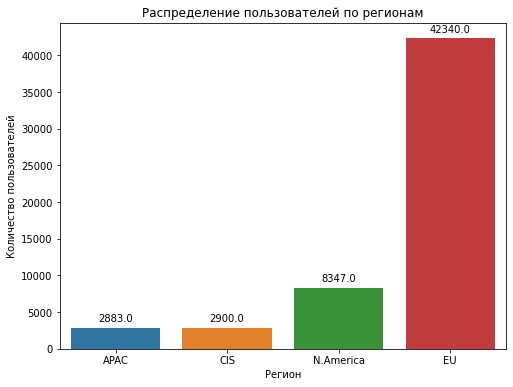

In [34]:
plt.figure(figsize=(8, 6))
a = sns.barplot(x='region', y='count', data=user_region.sort_values(by='count', ascending=True));
plt.xticks(rotation=0)
plt.title('Распределение пользователей по регионам');
plt.xlabel('Регион');
plt.ylabel('Количество пользователей');
for p in a.patches:
    a.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Оставим пользователей из целевого региона (EU)

In [35]:
user_eu = ab_users.query('region == "EU"')
user_eu['user_id'].nunique()

42340

**Пользователей с уникальными идентификаторами из стран EU 42340**

In [36]:
users_part = ab_users.merge(ab_participants, on='user_id', how='outer') 
users_part_1 = users_part.query('region == "EU" & ab_test =="recommender_system_test"')
display(users_part_1['user_id'].nunique())

6351

**Количество участников recommender_system_test из региона EU составило 6351**

In [37]:
print('Доля участников теста из EU: {:.2%}'.format((users_part_1['user_id'].nunique()/user_eu['user_id'].nunique())))

Доля участников теста из EU: 15.00%


**Доля участников теста из целевого региона составляет 15 % от общего количества пользователей из целевого региона**

### Проверка равномерности распределения пользователей по группам теста и корректности их формирования. Выявление пересечений с конкурирующим тестом

In [38]:
users_part_3 = users_part.query('region == "EU"')

In [39]:
users_part_3[users_part_3.duplicated(['user_id'])]

,user_id,first_date,region,device,group,ab_test
14,E6DE857AFBDC6102,2020-12-07,EU,PC,B,interface_eu_test
22,DD4352CDCF8C3D57,2020-12-07,EU,Android,A,interface_eu_test
206,7779596AE52635A8,2020-12-07,EU,iPhone,A,interface_eu_test
218,6A581C74EF4D5F44,2020-12-07,EU,iPhone,A,interface_eu_test
231,2B06EB547B7AAD08,2020-12-07,EU,PC,A,interface_eu_test
...,...,...,...,...,...,...
57928,549A5092FD1BD5D9,2020-12-20,EU,iPhone,B,interface_eu_test
57973,C27F677720E68EA4,2020-12-20,EU,Android,A,interface_eu_test
58006,902F92052587344F,2020-12-20,EU,Mac,A,interface_eu_test
58012,220B14060698D586,2020-12-20,EU,iPhone,A,interface_eu_test


In [40]:
users_part_3[users_part_3.duplicated(['user_id', 'group'])]

,user_id,first_date,region,device,group,ab_test
14,E6DE857AFBDC6102,2020-12-07,EU,PC,B,interface_eu_test
231,2B06EB547B7AAD08,2020-12-07,EU,PC,A,interface_eu_test
259,D755F72C453BF6A7,2020-12-07,EU,Mac,B,interface_eu_test
288,DF40EF85F55A958D,2020-12-07,EU,Mac,B,interface_eu_test
300,2E30DF2649604771,2020-12-07,EU,iPhone,B,interface_eu_test
...,...,...,...,...,...,...
57804,A3BEB02A027BA3C4,2020-12-20,EU,Android,A,interface_eu_test
57820,8D406B3B500671BD,2020-12-20,EU,PC,A,interface_eu_test
57898,FA8706D1E274805E,2020-12-20,EU,iPhone,B,interface_eu_test
57973,C27F677720E68EA4,2020-12-20,EU,Android,A,interface_eu_test


In [41]:
users_part_3.loc[users_part_3['user_id']=='E6DE857AFBDC6102']

,user_id,first_date,region,device,group,ab_test
13,E6DE857AFBDC6102,2020-12-07,EU,PC,B,recommender_system_test
14,E6DE857AFBDC6102,2020-12-07,EU,PC,B,interface_eu_test


In [42]:
users_part_3.loc[users_part_3['user_id']=='549A5092FD1BD5D9']

,user_id,first_date,region,device,group,ab_test
57927,549A5092FD1BD5D9,2020-12-20,EU,iPhone,A,recommender_system_test
57928,549A5092FD1BD5D9,2020-12-20,EU,iPhone,B,interface_eu_test


**Участники теста interface_eu_test также входят в группы А и В теста recommender_system_test**

In [43]:
users_part_3.pivot_table(index= 'group', columns = 'ab_test', values = 'user_id', aggfunc ='count')

ab_test,interface_eu_test,recommender_system_test
group,,
A,5342,3634
B,5223,2717


**Распределение количества пользователей из EU по тестам и группам показало, что в тесте recommender_system_test приняли участие 6351 человек, в группу В вошло 2717, что на 25,3 % меньше, чем в группу А (3634)**

**Определим, какое количество пользователей из группы B параллельного теста вошло в тест recommender_system_test**

In [44]:
users_part_4 = users_part_3.loc[users_part_3['ab_test']=='recommender_system_test']

In [45]:
users_part_5 = users_part_3.loc[(users_part_3['ab_test']=='interface_eu_test') & (users_part_3['group']=='B')]
users_ie = users_part_5['user_id'].unique()

In [46]:
users_part_6 = users_part_4[users_part_4['user_id'].isin(users_ie)]
from_B_ie = users_part_6.pivot_table(index= 'group', values = 'user_id', aggfunc ='count').reset_index()
from_B_ie.columns = ['group','from_B_ie']

users_part_7 = users_part_4[~users_part_4['user_id'].isin(users_ie)]
notB= users_part_7.pivot_table(index= 'group', values = 'user_id', aggfunc ='count').reset_index()
notB.columns = ['group','in_rec_s']

result_s = from_B_ie.merge(notB, on ='group')
result_s['sum'] = result_s['from_B_ie']+result_s['in_rec_s']
result_s['%'] = round((result_s['from_B_ie']/result_s['sum'])*100,1)
display(result_s)

,group,from_B_ie,in_rec_s,sum,%
0,A,439,3195,3634,12.1
1,B,344,2373,2717,12.7


**Посмотрим, есть ли в тесте пользователи, участвующие в обеих группах одновременно**

In [47]:
users_part_7['user_id'].duplicated().sum()

0

**пользователей, участвующих в обеих группах  теста одновременно не выявлено**

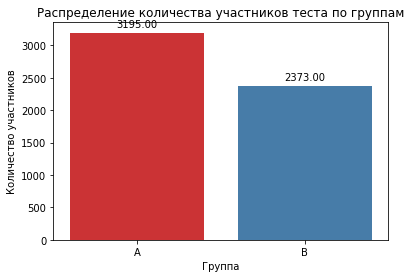

In [48]:
plt.figure(figsize=(6, 4))
a=sns.barplot(data=notB, x='group', y='in_rec_s', palette = 'Set1')
plt.title('Распределение количества участников теста по группам')   
plt.xlabel('Группа')
plt.ylabel('Количество участников')

for p in a.patches:
    a.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show;

**Количество участников теста recommender_system_test изначально составляло 6351 человек, после проверки пересечения участников группы В параллельного теста (interface_eu_test) и теста recommender_system_test было обнаружено, что 783 участника группы В теста interface_eu_test входят и в тест recommender_system_test. Их распределение по группам следующее А-439 и В-344, что составляет 12,1 и 12,7 процентов соответственно от начального количества. Процент вхождения примерно одинаков, и можно не удалять данных участников из теста, так как они внесут примерно равный вклад в результат теста, и таким образом общий результат не изменится. Удаление данного количества участников (а это составляет 12,3 от 6351) может уменьшить мощность теста. Для соблюдения чистоты проведения теста и получения более точных результатов, все же удалим данных участников. Таким образо, в тесте участвует 5568 уникальных пользователей (13.2 % от общего количества участников из региона EU), количество участников распределено по группам неравномерно.**

### Динамика набора пользователей в группы теста

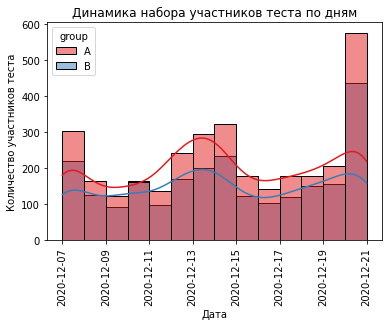

In [49]:
sns.histplot(data=users_part_7, x='first_date', hue = 'group', binwidth =1,
                 common_norm=False, palette = 'Set1', kde=True)
plt.title('Динамика набора участников теста по дням')       
plt.xlabel('Дата')
plt.ylabel('Количество участников теста')
plt.xticks(rotation=90)
plt.show;

**График показывает, что динамика набора пользователей была циклична, наибольший набор пользователей был на 1,8 и 14 день.Наименьший на 3 и 10 дни. При этом набор по группам был пропорционален. В группу А набиралось чуть больше пользователей, чем в В**

### Активность пользователей: все ли зарегистрированные пользователи прошли авторизацию и совершали переход по продуктовой воронке; если есть пользователи, которые не совершали событий после регистрации, изучите их количество и распределение между группами теста; сделайте вывод о необходимости учитывать пользователей без событий при изучении результатов теста

In [50]:
final_data = users_part_7.merge(ab_events, on ='user_id')

In [51]:
display(final_data)

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:10,product_page,NaN
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:07,login,NaN
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07 15:32:54,product_page,NaN
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08 08:29:31,product_page,NaN
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10 18:18:27,product_page,NaN
...,...,...,...,...,...,...,...,...,...
20559,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test,2020-12-21 22:28:29,product_page,NaN
20560,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test,2020-12-24 09:12:51,product_page,NaN
20561,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test,2020-12-20 20:58:25,login,NaN
20562,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test,2020-12-21 22:28:29,login,NaN


In [52]:
s = final_data.loc[final_data['event_name']=='login']
print(s['user_id'].nunique())
display(s)

3050


,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:07,login,NaN
8,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07 15:32:53,login,NaN
9,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08 08:29:27,login,NaN
10,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10 18:18:24,login,NaN
11,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-16 20:35:47,login,NaN
...,...,...,...,...,...,...,...,...,...
20553,574ACBC674BC385D,2020-12-20,EU,Mac,A,recommender_system_test,2020-12-20 04:15:43,login,NaN
20554,574ACBC674BC385D,2020-12-20,EU,Mac,A,recommender_system_test,2020-12-26 04:55:27,login,NaN
20561,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test,2020-12-20 20:58:25,login,NaN
20562,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test,2020-12-21 22:28:29,login,NaN


In [53]:
s.groupby('group').agg(users = ('user_id', 'nunique')).reset_index()

,group,users
0,A,2279
1,B,771


**Авторизировались в системе только 3050 пользователей: 2279 из группы А и 771 из В. При этом 2518 (45,2 %) пользователей никаких действий в системе после регистрации не совершали**

### Горизонт анализа: оставьте только те события, которые были совершены в первые 14 дней с момента регистрации; оцените когда пользователи совершают свои первые события каждого вида.

In [54]:
final_data ['time_d'] = (final_data['event_dt'] - final_data['first_date']).dt.total_seconds()
life_time = 60*60*24*14
final_data = final_data.query('time_d <= @life_time')
final_data['day_d']=final_data['time_d']/(60*60*24)

In [55]:
m = final_data.pivot_table(index = 'event_name', columns = 'group', values = 'day_d', aggfunc = ['mean','median']).reset_index()
m.columns = ['event_name', 'A_mn', 'B_mn', 'A_md', 'B_md']
display(m)

,event_name,A_mn,B_mn,A_md,B_md
0,login,3.379187,3.167943,2.091615,1.777269
1,product_cart,3.370582,3.119625,2.096725,1.724063
2,product_page,3.380387,3.087935,2.084005,1.685764
3,purchase,3.340959,3.083979,2.061441,1.617824


**Среднее и медианное время совершения действия внутри группы А или В, указывают на то, что добавление в корзину товара происходило раньше, чем авторизация**

In [56]:
(final_data['time_d']/(60*60*24)).describe()

count    19849.000000
mean         3.322655
std          3.330313
min          0.000046
25%          0.737245
50%          1.998993
75%          5.045347
max         13.995046
Name: time_d, dtype: float64

**Свои первые события каждого вида половина пользователей совершает спустя в два дня после регистрации. Четверти пользователей нужно менее одного дня до совершения собития, и четверти более пяти дней. Среднее время совершения действия составляет 3 дня.  При этом медианное значение совершения каждого действия в группе В меньше (т.е.событие наступает чуть быстрее), чем у пользователей из группы А.**

In [57]:
f = final_data.groupby(['user_id', 'event_name']).agg({'day_d': ['mean']}). reset_index()
f.columns = ['user_id', 'event_name', 'm_day']
display(f)

,user_id,event_name,m_day
0,0010A1C096941592,login,3.611042
1,0010A1C096941592,product_page,3.611050
2,0010A1C096941592,purchase,3.611042
3,00341D8401F0F665,login,1.989878
4,003DF44D7589BBD4,login,3.594137
...,...,...,...
6802,FFAE9489C76F352B,login,3.368927
6803,FFAE9489C76F352B,product_page,3.368951
6804,FFF28D02B1EACBE1,login,4.675031
6805,FFF28D02B1EACBE1,product_cart,4.675050


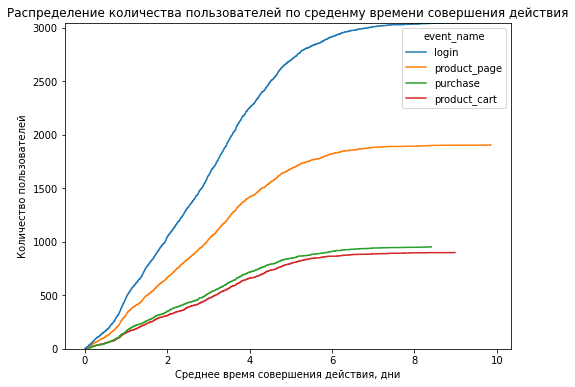

In [58]:
plt.figure(figsize=(8, 6))
sns.ecdfplot(data=f, x="m_day", hue="event_name", stat="count")
plt.title('Распределение количества пользователей по среденму времени совершения действия')   
plt.xlabel('Среднее время совершения действия, дни')
plt.ylabel('Количество пользователей')
plt.show;

**График показывает, что на каждом этапе (авторизация-просмотр страниц товаров-покупка-корзина) пользователей становится все меньше и меньше**

### ПРОМЕЖУТОЧНЫЙ ВЫВОД


В процессе подготовки данных было выполнено следующее:
* 1. Изучена общая информация о датасетах;
* 2. Проверено соответствие типов данных;
* 3. Проведено исследование пропущенных значений;
* 4. Исследованы данные на дублирующие значения

В процессе оценки корректности проведения теста были замечены следующие несоответствия данных техническому заданию:

* 1. Период набора пользователей в тест согласно датафрейму с 7 декабря по 23 декабря 2020 года. При этом согласно техническому заданию период набора с 7 декабря по 21 декабря 2020 года (лишние данные были удалены).
* 2. Период проведения теста согласно датафрейму с 7 декабря по 30 декабря 2020 года. При этом согласно техническому заданию период проведения теста с 7 декабря 2020 года по 4 января 2021 года.
* 3. Во время проведения теста в регионах EU, N.America проводилась маркетинговая акция "Christmas&New Year Promo". Возможно, это может отразиться на результатах теста.
* 4. Распределение количества пользователей из EU (начальное количество в тесте соответствует 15% от общего количества) по тестам и группам показало, что в тесте recommender_system_test приняли участие 6351 человек, в группу В вошло 2717, что на 25,3 % меньше, чем в группу А (3634).
* 5. Количество участников теста recommender_system_test изначально составляло 6351 человек, после проверки пересечения участников группы В параллельного теста (interface_eu_test) и теста recommender_system_test было обнаружено, что 783 участника группы В теста interface_eu_test входят и в тест recommender_system_test. Их распределение по группам следующее А-439 и В-344, что составляет 12,1 и 12,7 процентов соответственно от начального количества.  Для соблюдения чистоты проведения теста и получения более точных результатов, было принято решение удалить данных участников. Таким образом, в тесте участвует 5568 уникальных пользователей (13.2 % от общего количества участников из региона EU), количество участников распределено по группам неравномерно. Пользователей, участвующих в обеих группах  теста одновременно не выявлено.
* 6. Предварительный анализ динамики набора пользователей  показал, что набор был цикличен, наибольший набор пользователей был на 1,8 и 14 день.Наименьший на 3 и 10 дни. При этом набор по группам был пропорционален. В группу А набиралось чуть больше пользователей, чем в Вю
* 7. Было выявлено, что авторизировались в системе только 3050 пользователей: 2279 из группы А и 771 из В. При этом 2518 (45,2 %) пользователей никаких действий в системе после регистрации не совершали.
* 8. Свои первые события каждого вида половина пользователей совершает спустя в два дня после регистрации. Четверти пользователей нужно менее одного дня до совершения собития, и четверти более пяти дней. Среднее время совершения действия составляет 3 дня.  При этом медианное значение совершения каждого действия в группе В меньше (т.е.событие наступает чуть быстрее), чем у пользователей из группы А. 
* 9. Распределение количества пользователей по среденму времени совершения действия показывает, что на каждом этапе (авторизация-просмотр страниц товаров-покупка-корзина) пользователей становится все меньше и меньше.

## ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ
<a id="part_4"></a> 

### Распределение количества событий на пользователя в разрезе групп теста: постройте гистограмму распределения этой величины в разрезе групп и сравните её средние значения между собой у групп теста;

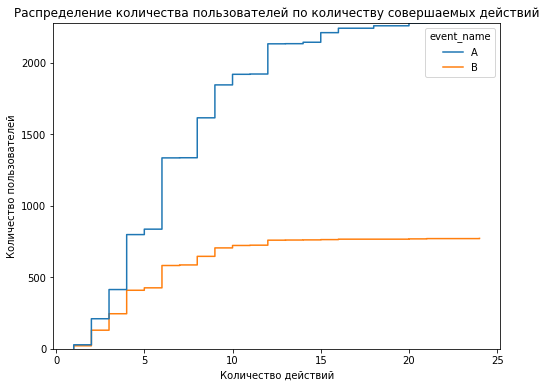

In [59]:
w = final_data.groupby(['user_id', 'group']).agg({'event_name': ['count']}). reset_index()
w.columns = ['user_id', 'event_name', 'm_day']
plt.figure(figsize=(8, 6))
sns.ecdfplot(data=w, x="m_day", hue="event_name", stat="count")
plt.title('Распределение количества пользователей по количеству совершаемых действий')   
plt.xlabel('Количество действий')
plt.ylabel('Количество пользователей')
plt.show;

**График распределения количества пользователей от количества действий показывает, что отношение количества пользователей к количеству действий в группе А в 3 раза выше, чем в группе Б. При этом суммарное количество действий по обеим группам превышает 20, а это говорит о том, что либо на каком-то этапе у пользователей возникают сложности в техническом плане (например не могут пройти авторизацию, и авторизуются несколько раз, либо имеются сомнения в выборе товара и смотрят несколько раз страницу, или же опять же испытывают технические или иные затруднения на этапе покупки и прохождения к корзине)**

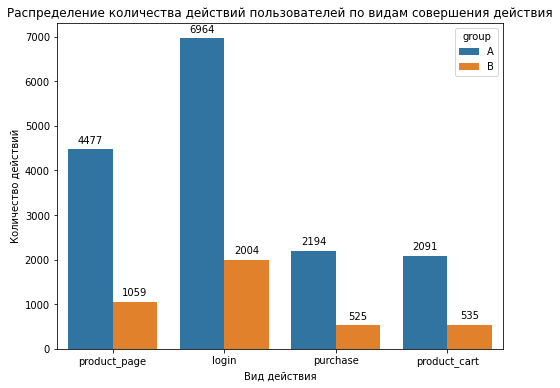

In [60]:
t = final_data.pivot_table(index = 'event_name', columns = 'group', values = 'user_id', aggfunc = 'count').reset_index()
plt.figure(figsize=(8, 6))
a=sns.countplot(data=final_data, x="event_name", hue="group")
plt.title('Распределение количества действий пользователей по видам совершения действия')   
plt.xlabel('Вид действия')
plt.ylabel('Количество действий')
for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show;

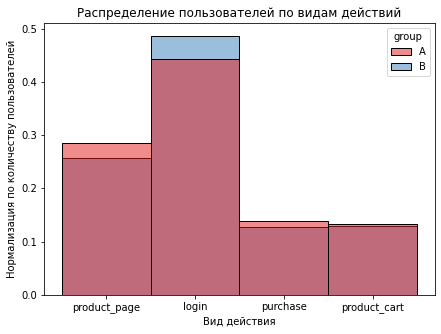

In [61]:
plt.figure(figsize=(7, 5))
sns.histplot(data=final_data, hue='group', x='event_name', stat='density', 
                 common_norm=False, palette = 'Set1')
plt.title('Распределение пользователей по видам действий')       
plt.xlabel('Вид действия')
plt.ylabel('Нормализация по количеству пользователей')
plt.show;

**График показывает, что очень много действий совершено пользователями группы В на этапе авторизации. На последующих пользователи группы А были активнее.**

In [62]:
w = final_data.query('event_name=="login"').groupby(['user_id', 'group']).agg({'event_name': ['count']}). reset_index()
w.columns = ['user_id', 'group', 'count']

e = final_data.query('event_name=="product_page"').groupby(['user_id', 'group']).agg({'event_name': ['count']}). reset_index()
e.columns = ['user_id', 'group', 'count']

f = final_data.query('event_name=="product_cart"').groupby(['user_id', 'group']).agg({'event_name': ['count']}). reset_index()
f.columns = ['user_id', 'group', 'count']

d = final_data.query('event_name=="purchase"').groupby(['user_id', 'group']).agg({'event_name': ['count']}). reset_index()
d.columns = ['user_id', 'group', 'count']


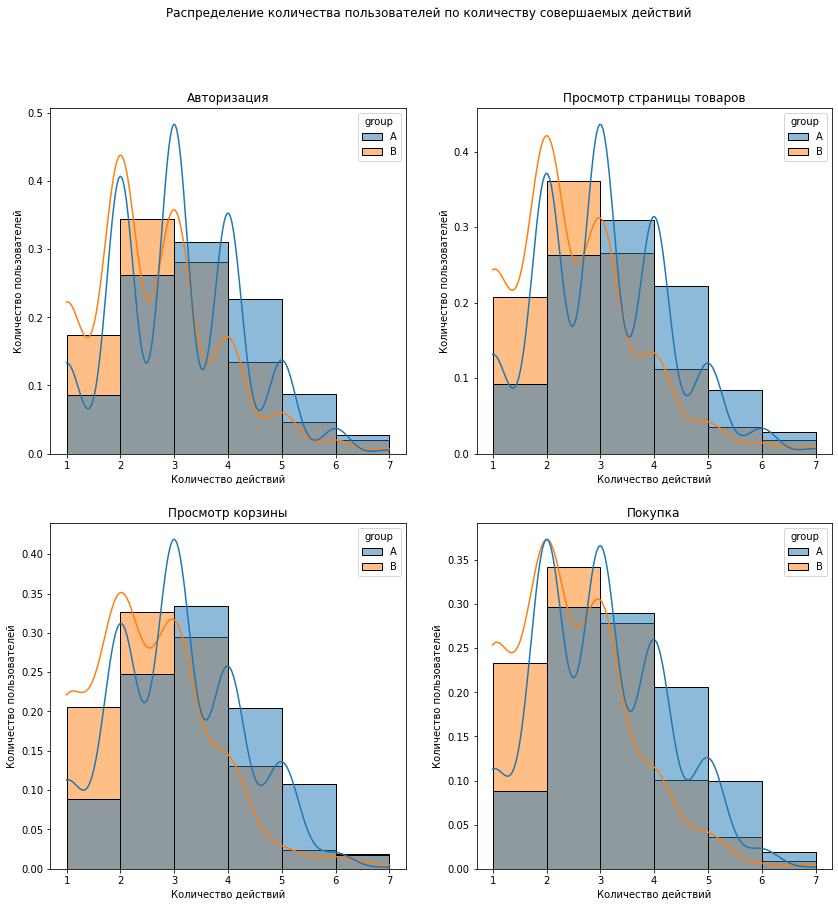

In [63]:
plt.subplots(2, 2, figsize=(14, 14))

plt.subplot(2, 2, 1)
sns.histplot(data=w, x="count", hue = 'group', kde=True, binwidth =1, stat='density', common_norm=False)
plt.title('Авторизация')   
plt.xlabel('Количество действий')
plt.ylabel('Количество пользователей')
plt.subplot(2, 2, 2)
sns.histplot(data=e, x="count", hue = 'group', kde=True, binwidth =1, stat='density', common_norm=False)
plt.title('Просмотр страницы товаров')   
plt.xlabel('Количество действий')
plt.ylabel('Количество пользователей')
plt.subplot(2, 2, 3)
sns.histplot(data=f, x="count", hue = 'group', kde=True, binwidth =1, stat='density', common_norm=False)
plt.title('Просмотр корзины')   
plt.xlabel('Количество действий')
plt.ylabel('Количество пользователей')
plt.subplot(2, 2, 4)
sns.histplot(data=d, x="count", hue = 'group', kde=True, binwidth =1, stat='density', common_norm=False)
plt.title('Покупка')   
plt.xlabel('Количество действий')
plt.ylabel('Количество пользователей')

plt.suptitle('Распределение количества пользователей по количеству совершаемых действий')
plt.show();

**График показывает, что на каждом этапе большинство пользователи группы В совершали от 1 до 3 действий, в то время как большая часть пользователей группы А от 3 до 6. Кажется, у большей части либо что-то не получалось, либо они были очень активны. Это посмотрим в продуктовой воронке**

### Динамика количества событий в группах теста по дням: изучите распределение числа событий по дням и сравните динамику групп теста между собой. Убедитесь, что время проведения теста не совпадает с маркетинговыми и другими активностями. Настройте автоматическую проверку, выдающую список событий, пересекающихся с тестом. 

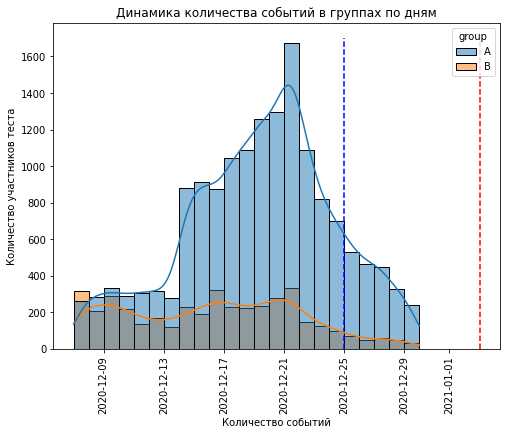

In [64]:
plt.figure(figsize=(8, 6))
sns.histplot(data=final_data, x='event_dt', hue = 'group', binwidth =1, kde=True)
n = m_events.loc[(m_events['start_dt']>'2020-12-7') & (m_events['start_dt']<'2020-12-30')]
plt.vlines(x=n['start_dt'], ymin = 0, ymax = 1700, color='blue', linestyle='--')
z = m_events.loc[m_events['finish_dt']<'2020-12-31']
plt.vlines(x=n['finish_dt'], ymin = 0, ymax = 1700, color='red', linestyle='--')
plt.title('Динамика количества событий в группах по дням')       
plt.xlabel('Количество событий')
plt.ylabel('Количество участников теста')
plt.xticks(rotation=90)
plt.show;

**Динамика количества событий по дням показывает, что пользователи группы А были наиболее активны, при этом пик активности пришелся с 15 по 24 декабря (время предновогодних покупок). Активность пользователей группы В меньше и более равномерна, нет ярко выраженного всплеска событий. После 24 декабря в обех группах можно проследить уменьшение активности. Так же можно увидеть, что с 25 декабря по 3 января в регионах EU проводилась маркетинговая акция "Christmas&New Year Promo", в рамки проведения которой частично попал наш тест. Никаких всплесков и выбросов данная рекламная акция не дала, на графике видно уменьшение активности, что вполне отражает покупательскую деятельность пользователей после Рождества. Праздники закончились - активность должна снизиться.**

### Продуктовая воронка: постройте простые продуктовые воронки для двух групп теста с учетом логической последовательности совершения событий; изучите изменение конверсии в продуктовой воронке тестовой группы, по сравнению с контрольной: наблюдается ли ожидаемый эффект увеличения конверсии в группе В на 10 процентных пунктов, относительно конверсии в группе А?

In [65]:
users_count = final_data.pivot_table(index='group', columns='event_name', values = 'user_id', aggfunc=lambda x: len(x.unique()))
users_count['0-1'] = [71.13, 32.45]
users_count['1-2'] = round(users_count['product_page']*100/users_count['login'],2)
users_count['2-3'] = round(users_count['product_cart']*100/users_count['product_page'],2)
users_count['3-4'] = round(users_count['purchase']*100/users_count['product_cart'],2)
users_count['1-2'] = round(users_count['product_page']*100/users_count['login'],2)
users_count['1-3'] = round(users_count['product_cart']*100/users_count['login'],2)
users_count['1-4'] = round(users_count['purchase']*100/users_count['login'],2)
display(users_count) 

event_name,login,product_cart,product_page,purchase,0-1,1-2,2-3,3-4,1-3,1-4
group,,,,,,,,,,
A,2279,686,1476,734,71.13,64.77,46.48,107.00,30.10,32.21
B,770,214,429,219,32.45,55.71,49.88,102.34,27.79,28.44


In [ ]:
pio.templates.default = "plotly_white"
stages = ["Website visit", "Login", "Product_page", "Product_cart", "Purchase"]
number=[3195, 2279, 1476, 686, 734]
number_1=[2373, 770, 429, 214, 219]
fig = go.Figure(go.Funnel(y=stages, x=number, textposition='inside', textinfo='value', name="A"))
fig.add_trace(go.Funnel(y=stages, x=number_1, textposition='inside', textinfo='value', name="В"))
fig.update_layout( title="Воронка продаж", funnelmode="stack")
fig.show()

**Конверсия у пользователей группы А (отношение количества покупок к количеству зарегистрированных пользователей) составила 32.2 %, группы В - 28.44, что дает разницу в 3.77%. При этом процент перехода из зашедших на сайт к авторизованным выше у А - 71%, В - 32% (разница - 39%), но при этом процент перехода уже от "просмотр товара-корзина" выше у группы В на 3.4%. Так же можно заметить, что количество покупок больше количества просмотров корзины в обеих группах, это может означать, что пользователи делают покупку, минуя стадию просмотра корзины. Ожидаемый эффект увеличения конверсии в группе В на 10 процентных пунктов, относительно конверсии в группе А не наблюдается.**

## ОЦЕНКА РЕЗУЛЬТАТОВ A/B-ТЕСТИРОВАНИЯ
<a id="part_5"></a> 

**Проверим три гипотезы о равенстве долей уникальных пользователей в группах А и В при конверсии в:**

* просмотр карточек товаров (product_page)
* просмотр корзины (product_cart)
* покупке (purchase)

**Основная и альтернативная гипотезы следующие:**
* H_0 : доли уникальных посетителей на n этапе воронки одинаковы
* H_1 : доли уникальных посетителей на n этапе воронки отличаются

In [ ]:
def z_test(u_1, u_2, event):
         
    alpha = 0.05/3
 
    # число пользователей в группе A и B:
    leads = np.array([u_1['user_id'].nunique(), 
                      u_2['user_id'].nunique()])

    # число пользователей, совершивших событие в группе A и B
    success = np.array([u_1[u_1['event_name'] == event]['user_id'].nunique(), 
                        u_2[u_2['event_name'] == event]['user_id'].nunique()])

    # пропорции успехов в группах:
    p1 = success[0]/leads[0]
    p2 = success[1]/leads[1]
    
    print(leads[0], leads[1])
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (success[0] + success[1]) / (leads[0] + leads[1])
    
    # разница пропорций в датасетах
    difference = p1 - p2 
    
    # считаем статистику в ст.отклонениях нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
    
    # задаём нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2   # тест двусторонний, удваиваем результат
    
    print('Событие:', event)
    print('p_значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

In [ ]:
for event in ['product_page', 'product_cart', 'purchase']:
    z_test(final_data.query('group =="A"'), final_data.query('group =="B"'), event)
    print()

## ВЫВОД:
<a id="part_6"></a> 

В процессе оценки корректности проведения теста были замечены следующие несоответствия данных техническому заданию:

* 1. Период набора пользователей в тест согласно датафрейму с 7 декабря по 23 декабря 2020 года. При этом согласно техническому заданию период набора с 7 декабря по 21 декабря 2020 года (лишние данные были удалены).
* 2. Период проведения теста согласно датафрейму с 7 декабря по 30 декабря 2020 года. При этом согласно техническому заданию период проведения теста с 7 декабря 2020 года по 4 января 2021 года.
* 3. Во время проведения теста в регионах EU, N.America проводилась маркетинговая акция "Christmas&New Year Promo". Возможно, это может отразиться на результатах теста.
* 4. Распределение количества пользователей из EU (начальное количество в тесте соответствует 15% от общего количества) по тестам и группам показало, что в тесте recommender_system_test приняли участие 6351 человек, в группу В вошло 2717, что на 25,3 % меньше, чем в группу А (3634).
* 5. Количество участников теста recommender_system_test изначально составляло 6351 человек, после проверки пересечения участников группы В параллельного теста (interface_eu_test) и теста recommender_system_test было обнаружено, что 783 участника группы В теста interface_eu_test входят и в тест recommender_system_test. Их распределение по группам следующее А-439 и В-344, что составляет 12,1 и 12,7 процентов соответственно от начального количества.  Для соблюдения чистоты проведения теста и получения более точных результатов, было принято решение удалить данных участников. Таким образом, в тесте участвует 5568 уникальных пользователей (13.2 % от общего количества участников из региона EU), количество участников распределено по группам неравномерно. Пользователей, участвующих в обеих группах  теста одновременно не выявлено.
* 6. Предварительный анализ динамики набора пользователей  показал, что набор был цикличен, наибольший набор пользователей был на 1,8 и 14 день.Наименьший на 3 и 10 дни. При этом набор по группам был пропорционален. В группу А набиралось чуть больше пользователей, чем в В.
* 7. Было выявлено, что авторизировались в системе только 3050 пользователей: 2279 из группы А и 771 из В. При этом 2518 (45,2 %) пользователей никаких действий в системе после регистрации не совершали.
* 8. Свои первые события каждого вида половина пользователей совершает спустя в два дня после регистрации. Четверти пользователей нужно менее одного дня до совершения собития, и четверти более пяти дней. Среднее время совершения действия составляет 3 дня.  При этом медианное значение совершения каждого действия в группе В меньше (т.е.событие наступает чуть быстрее), чем у пользователей из группы А. 
* 9. Распределение количества пользователей по среденму времени совершения действия показывает, что на каждом этапе (авторизация-просмотр страниц товаров-покупка-корзина) пользователей становится все меньше и меньше.
* 10. График распределения количества пользователей от количества действий показывает, что отношение количества пользователей к количеству действий в группе А в 3 раза выше, чем в группе Б. При этом суммарное количество действий по обеим группам превышает 20, а это говорит о том, что либо на каком-то этапе у пользователей возникают сложности в техническом плане (например не могут пройти авторизацию, и авторизуются несколько раз, либо имеются сомнения в выборе товара и смотрят несколько раз страницу, или же опять же испытывают технические или иные затруднения на этапе покупки и прохождения к корзине)
* 11. Динамика количества событий по дням показывает, что пользователи группы А были наиболее активны, при этом пик активности пришелся с 15 по 24 декабря (время предновогодних покупок). Активность пользователей группы В меньше и более равномерна, нет ярко выраженного всплеска событий. После 24 декабря в обех группах можно проследить уменьшение активности. Так же можно увидеть, что с 25 декабря по 3 января в регионах EU проводилась маркетинговая акция "Christmas&New Year Promo", в рамки проведения которой частично попал наш тест. Никаких всплесков и выбросов данная рекламная акция не дала, на графике видно уменьшение активности, что вполне отражает покупательскую деятельность пользователей после Рождества. Праздники закончились - активность должна снизиться.
* 11. Конверсия у пользователей группы А (отношение количества покупок к количеству зарегистрированных пользователей) составила 32.2 %, группы В - 28.44, что дает разницу в 3.77%. При этом процент перехода из зашедших на сайт к авторизованным выше у А - 71%, В - 32% (разница - 39%), но при этом процент перехода уже от "просмотр товара-корзина" выше у группы В на 3.4%. Так же можно заметить, что количество покупок больше количества просмотров корзины в обеих группах, это может означать, что пользователи делают покупку, минуя стадию просмотра корзины. Ожидаемый эффект увеличения конверсии в группе В на 10 процентных пунктов, относительно конверсии в группе А не наблюдается.
* 12. Проверка гипотез о равенстве долей уникальных пользователей двух групп показала следующее: доли уникальных пользователей, побывавших на этапе Просмотр товара, отличаются. Отсутствует статистически значимая разница в долях уникальных пользователей между группами А и В при конверсии в Просмотр корзины и в Покупку. Согласно полученным результатам анализа, новая рекомендательная система целевые метрики не улучшила.

* Рекомендуется доработать механизм формирования тестовых групп и запустить тест заново
